In [1]:
# Importing Google Drive module
from google.colab import drive

# Mounting Google Drive to access files
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Copying 'images.rar' from Google Drive to the Colab working directory
!cp /content/drive/MyDrive/images.rar /content/


In [3]:
# Make a folder called 'images' in the current directory
!mkdir /content/images

# Extract the contents of 'images.rar' into the 'images' folder
!unrar x /content/images.rar /content/images/


Streaming output truncated to the last 5000 lines.
Extracting  /content/images/5/pp_r_f_lm00001.png                          88%  OK 
Extracting  /content/images/5/pp_r_f_lm00002.png                          88%  OK 
Extracting  /content/images/5/pp_r_f_lm00003.png                          88%  OK 
Extracting  /content/images/5/pp_r_f_lm00004.png                          88%  OK 
Extracting  /content/images/5/pp_r_f_lm00005.png                          88%  OK 
Extracting  /content/images/5/pp_r_f_lm00006.png                          88%  OK 
Extracting  /content/images/5/pp_r_f_lm00007.png                          88%  OK 
Extracting  /content/images/5/pp_r_f_lm00008.png                          88%  OK 
Extracting  /content/images/5/pp_r_f_lm00009.png                          88%  OK 
Extracting  /content/images/5/pp_r_f_lm00010.png                          88%  OK 
Extracting  /content/images/5

In [4]:
# %%
# Import necessary libraries for data manipulation, visualization, and deep learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2

In [5]:
# %%
# Define a label map for the dataset categories
label_map = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
print("Labels: ", label_map.keys())

Labels:  dict_keys(['1', '2', '3', '4', '5'])


In [6]:
# %%
# Specify the path where the extracted images are stored
images_path = '/content/images/'

In [7]:
# Initialize lists for image data (x) and labels (y)
x, y = [], []

# Iterate through categories and process images
for category in range(1, 6):
    scategory = str(category)
    cat_images_path = images_path + scategory + '/'
    for cat_single in os.listdir(cat_images_path):
        img_path = images_path + scategory + '/' + cat_single
        img = cv2.imread(img_path, 0)
        img = img.reshape((224,224,1))  # Reshape to 224x224
        img = img / 255.0  # Normalize pixel values
        x.append(img)  # Add image to x
        y.append(label_map[scategory])  # Add label to y


In [8]:
# %%
# Convert image data and labels to NumPy arrays
X = np.array(x)
Y = np.array(y)

# One-hot encode the labels for categorical classification
Y = to_categorical(Y)

# Shuffle the dataset to ensure random distribution of data points
X, Y = shuffle(X, Y)

# Determine the number of categories (classes) based on the shape of Y
categories = Y.shape[1]


In [9]:
# %%
# shape of the image data and labels
print(X.shape, Y.shape)

(50000, 224, 224, 1) (50000, 6)


In [10]:
# %%
# Split dataset into training(0.8) and testing sets(0.2)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# further split training set into training(0.75) and validation sets (0.25).
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, random_state=42)

# sizes of the training, validation, and test sets
print("Training set size:", X_train.shape, Y_train.shape)
print("Validation set size:", X_val.shape, Y_val.shape)
print("Test set size:", X_test.shape, Y_test.shape)

Training set size: (30000, 224, 224, 1) (30000, 6)
Validation set size: (10000, 224, 224, 1) (10000, 6)
Test set size: (10000, 224, 224, 1) (10000, 6)


In [11]:
# %%
# import necessary layeres for building CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

In [12]:
# %%
# Define a Sequential Convolutional Neural Network (CNN) model
model = Sequential()

# first convolutional layer with 32 filters and ReLU activation
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(224,224,1)))

# first max-pooling layer to downsample
model.add(MaxPooling2D(pool_size=(2, 2)))

# Subsequent convolutional layers with increasing filters
model.add(Conv2D(64, kernel_size=(3,3), activation='relu')) # 64 fiters
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu')) # 128 filters
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu')) # 256 filters
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add global average pooling for reducing spatial diemntions
model.add(GlobalAveragePooling2D())

# fully connected layer (Dense layer) with 128 units and relu activation function
model.add(Dense(128, activation='relu'))

# dropout layer to reduce overfitting
model.add(Dropout(0.3))

# Output layer with softmax activation function for multiclass classification
model.add(Dense(categories, activation='softmax'))

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [13]:
# %%
# Create a directory to save the model if it doesn't already exist
model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Specify the path to save the best model
model_path = os.path.join(model_dir, "m1.keras")

# Define a checkpoint callback to save the best model based on validation loss
checkpoint_callback = ModelCheckpoint(model_path, save_best_only=True, save_weights_only=False, monitor='val_loss', verbose=1)

In [14]:
# %%
# Train the model using the training data, validating with the validation set
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=1, callbacks=[checkpoint_callback], batch_size=8, verbose=1)

3750/3750 [==============================] - ETA: 0s - loss: 0.3169 - accuracy: 0.8700
Epoch 1: val_loss improved from inf to 0.06253, saving model to models/m1.keras
3750/3750 [==============================] - 2457s 655ms/step - loss: 0.3169 - accuracy: 0.8700 - val_loss: 0.0625 - val_accuracy: 0.9797


In [15]:
# %%
# Load the best saved model from the specified path
best_model = load_model(model_path)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Loss: {test_loss}")        # Print the test loss
print(f"Test Accuracy: {test_accuracy}")  # Print the test accuracy

313/313 [==============================] - 213s 679ms/step - loss: 0.0671 - accuracy: 0.9788
Test Loss: 0.06709763407707214
Test Accuracy: 0.9787999987602234


313/313 [==============================] - 211s 675ms/step


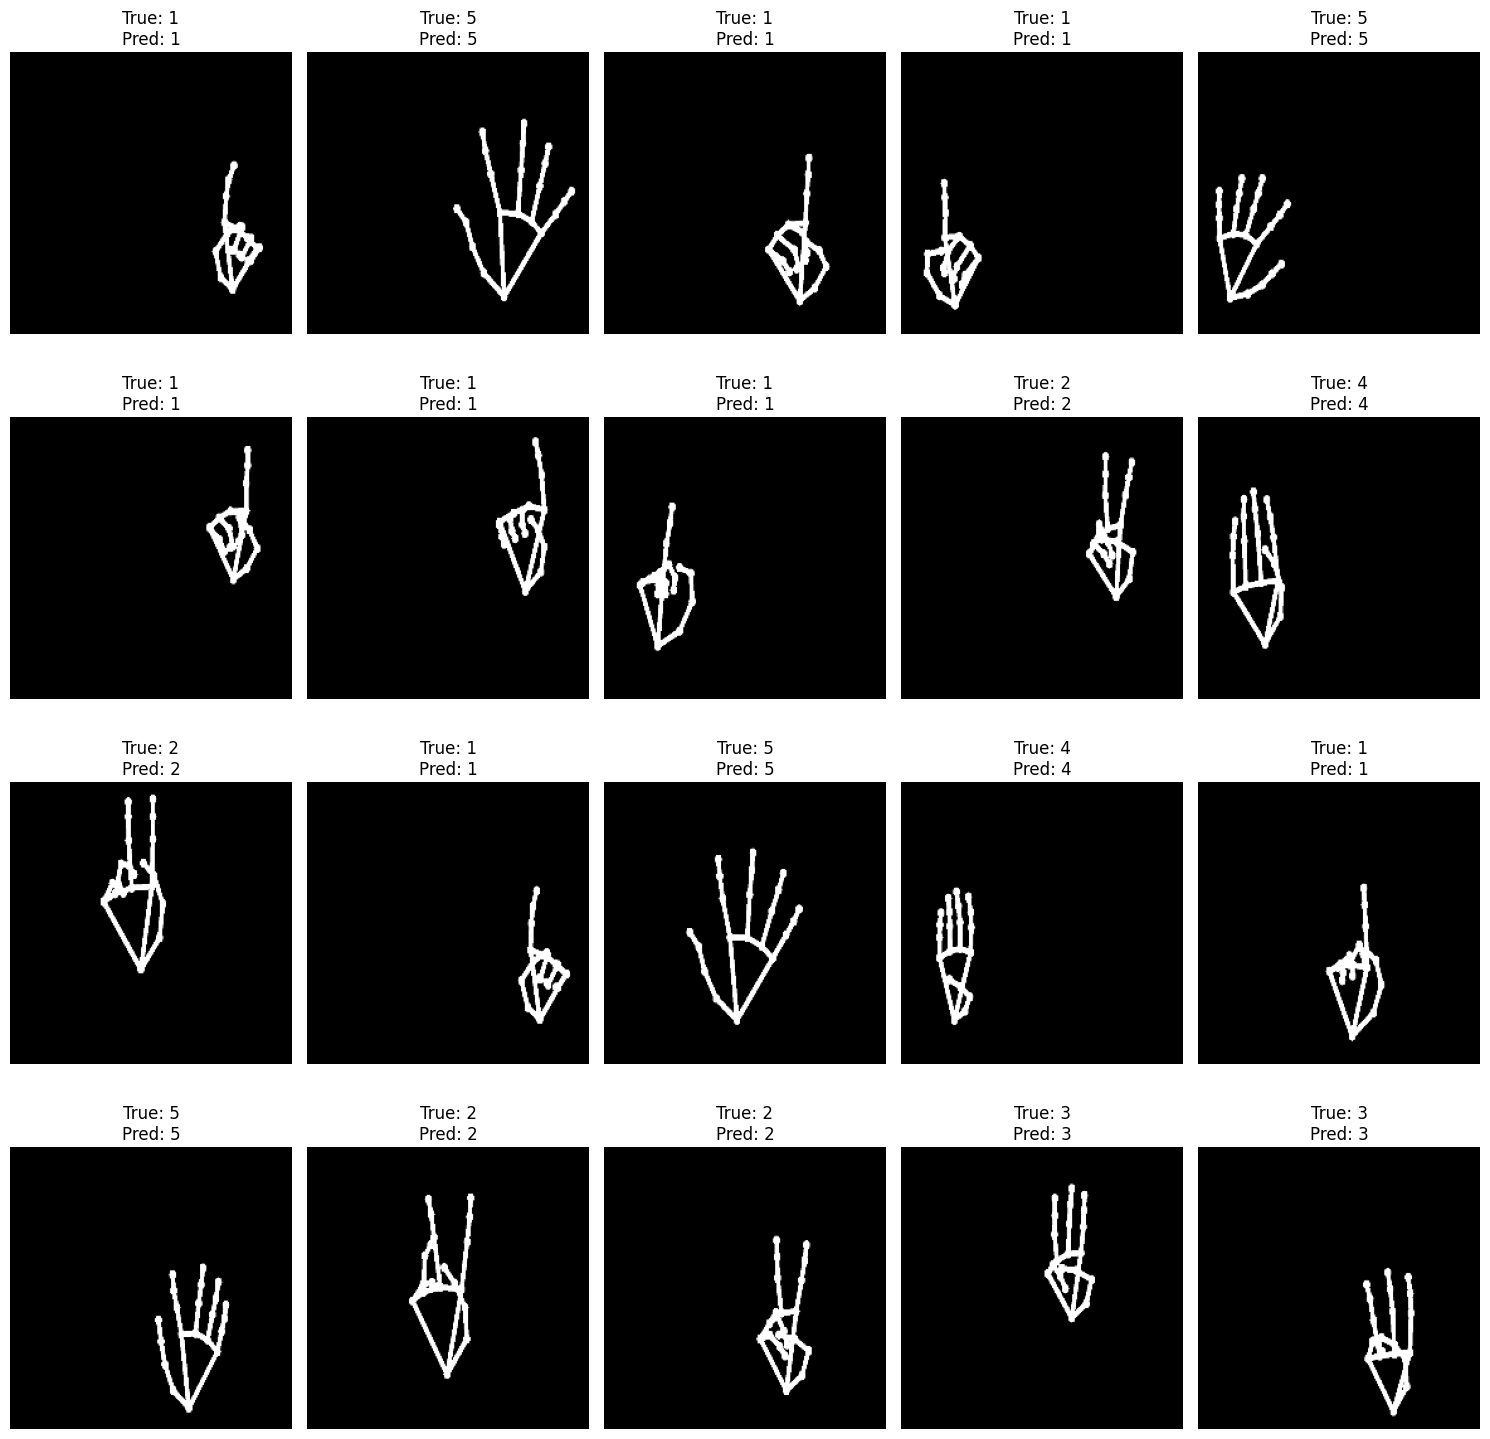

In [16]:
# %%
# Generate predictions using the best model on the test set
predictions = best_model.predict(X_test)

# Determine the predicted class for each test sample
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels for the test samples
true_classes = np.argmax(Y_test, axis=1)

# Visualize some test samples along with their true and predicted labels
num_samples = 20  # Number of samples to visualize
num_cols = 5      # Number of columns in the plot grid
num_rows = math.ceil(num_samples / num_cols)  # Calculate the number of rows needed

plt.figure(figsize=(15, 15))  # Set the figure size
for i in range(num_samples):
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each sample
    plt.imshow(X_test[i].reshape(224, 224), cmap='gray')  # Display the image
    plt.axis('off')  # Hide the axis
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")  # Add title with true and predicted labels
plt.tight_layout()  # Adjust layout for better visualization
plt.show()  # Display the plot